
# ---> MODELO DE PROPENSION DE COMPRA <---

# 1. CARGA DE DATOS

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("DS_Compra.csv")

In [4]:
# Revición Inicial
data.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [7]:
data.tail()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
395,10396,F,46.0,3400,C,1
396,10397,M,51.0,1900,S,1
397,10398,F,50.0,1600,S,1
398,10399,M,36.0,2700,C,0
399,10400,F,49.0,3000,C,1


In [8]:
data.shape

(400, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           387 non-null float64
INGRESOS       400 non-null int64
ESTADOCIVIL    392 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.8+ KB


In [5]:
# Obtenere tipos de datos
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64


# 2. ANÁLISIS DESCRIPTIVO DE LOS DATOS

In [6]:
data.describe(include = 'all')

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
count,400.000000,400,387.000000,400.000000,392,400.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,F,NaN,NaN,S,NaN
freq,NaN,204,NaN,NaN,214,NaN
mean,10200.500000,NaN,37.589147,6476.500000,NaN,0.357500
std,115.614301,NaN,10.523312,7705.031897,NaN,0.479864
min,10001.000000,NaN,18.000000,1200.000000,NaN,0.000000
25%,10100.750000,NaN,29.000000,3500.000000,NaN,0.000000
50%,10200.500000,NaN,37.000000,5800.000000,NaN,0.000000
75%,10300.250000,NaN,46.000000,7300.000000,NaN,1.000000


In [7]:
# Frecuencias de estado civil
data["ESTADOCIVIL"].value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [8]:
# Frecuencias relativas de estado civil
data["ESTADOCIVIL"].value_counts(normalize = True, dropna = False) 
# normalize: para frecuenciaas relativas 
# dropna: eliminar nulos

S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64

In [9]:
# Edad
data["EDAD"].value_counts(bins = 5 , normalize = True)
# bins: nro de rangos a agrupar
# normalize: para frecuenciaas relativas 

(34.8, 43.2]      0.3450
(26.4, 34.8]      0.1900
(17.957, 26.4]    0.1625
(43.2, 51.6]      0.1600
(51.6, 60.0]      0.1100
Name: EDAD, dtype: float64

In [10]:
# Generar rangos según nuestross límites deseados:
def genera_rangos(valor):
    if pd.isnull(valor):
        return("Nuloooooooo")
    elif valor <= 30 :
        return("[18-30]")
    elif valor <= 50 :
        return("(30-50]")
    elif valor <= 60 :
        return("(50-60]")
    else:
        return('Nan')
genera_rangos(35)

'(30-50]'

In [11]:
data["EDAD_RANGO"] = data["EDAD"].apply(lambda x: genera_rangos(x))

In [12]:
data["EDAD_RANGO"].value_counts(normalize = True)

(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64

In [13]:
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64
EDAD_RANGO,object


In [14]:
# Ver solo las columnas del dataframe:
data.columns.values

array(['ID', 'SEXO', 'EDAD', 'INGRESOS', 'ESTADOCIVIL', 'FLAG_COMPRA',
       'EDAD_RANGO'], dtype=object)

In [15]:
# Seleccionar variables categoricas (object)
vars_str = data.select_dtypes(include = ['object']).columns.values

In [16]:
for feature in vars_str:
    print("---------------------------------------------")
    print(data[feature].value_counts(normalize = True, dropna = False) )

---------------------------------------------
F    0.51
M    0.49
Name: SEXO, dtype: float64
---------------------------------------------
S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64
---------------------------------------------
(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64


In [17]:
# Concatenar dataframes
pd.concat([data,data], axis = 1)  # axis = 0: concatena por filas, axis = 1: concatena por columnnas

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30],10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50],10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30],10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30],10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30],10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30],10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30],10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50],10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30],10009,M,25.0,2700,C,0,[18-30]
9,10010,F,NaN,5400,C,0,Nuloooooooo,10010,F,NaN,5400,C,0,Nuloooooooo


In [18]:
df1 = pd.DataFrame(data["ESTADOCIVIL"].value_counts())
df1 = df1.rename(columns = {'ESTADOCIVIL' : "FREC_ABS"})
df1.head()

,FREC_ABS
S,214
C,125
D,53


In [19]:
df2 = pd.DataFrame(data["ESTADOCIVIL"].value_counts(normalize = True))
df2 = df2.rename(columns = {'ESTADOCIVIL' : "FREC_REL"})
df2.head()

,FREC_REL
S,0.545918
C,0.318878
D,0.135204


In [20]:
df3 = pd.DataFrame(data.groupby(by=['ESTADOCIVIL'], as_index = False )['FLAG_COMPRA'].mean())
df3.head()

,ESTADOCIVIL,FLAG_COMPRA
0,C,0.248000
1,D,0.245283
2,S,0.448598


In [21]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['FLAG_COMPRA'], 
                 values = ['ID'], 
                 aggfunc = 'count')       

ID    
FLAG_COMPRA    0   1
ESTADOCIVIL         
C             94  31
D             40  13
S            118  96

In [22]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['SEXO'], 
                 values = ['FLAG_COMPRA'], 
                 aggfunc = 'mean')       

FLAG_COMPRA          
SEXO                  F         M
ESTADOCIVIL                      
C              0.258065  0.238095
D              0.275862  0.208333
S              0.481481  0.415094

# 3. PREPROCESAMIENTO DE DATOS

## 3.1 Tratamiento de Valores Nulos

In [23]:
data.isnull().sum()

ID              0
SEXO            0
EDAD           13
INGRESOS        0
ESTADOCIVIL     8
FLAG_COMPRA     0
EDAD_RANGO      0
dtype: int64

In [24]:
#### Imputar valores missing
data["EDAD"].fillna(data["EDAD"].median(), inplace = True)
data["ESTADOCIVIL"].fillna(data["ESTADOCIVIL"].mode()[0], inplace = True)

In [25]:
data.isnull().sum()

ID             0
SEXO           0
EDAD           0
INGRESOS       0
ESTADOCIVIL    0
FLAG_COMPRA    0
EDAD_RANGO     0
dtype: int64

## 3.2 Tratamiento de Outliers

In [26]:
# Percetiles 
np.nanpercentile(data['EDAD'], [0,1,5,10,50,75,90,95, 99,100])

array([ 18.,  18.,  21.,  24.,  37.,  45.,  52.,  57.,  60.,  60.])

In [27]:
# Calcular Percentile 90
np.nanpercentile(data['EDAD'], [90])[0]

52.0

In [28]:
# Identificar registros con edad mayor al percentile 90
indices_percmayor90 = data['EDAD'] > np.nanpercentile(data['EDAD'], [90])[0]

In [29]:
# "Topeamos" (reemplazo esos valores por un valor tope (perc 90))
data.loc[indices_percmayor90, "EDAD"] = 52

In [30]:
max(data.EDAD)

52.0

## 3.2 Conversion de Variables

In [31]:
df = data.copy()

In [32]:
df.head(10)

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30]
9,10010,F,37.0,5400,C,0,Nuloooooooo


In [33]:
# SEXO -- Variable Dummy
dicc_sexo = {'M': 1,
             'F': 0}
df['SEXO'] = df['SEXO'].map(dicc_sexo)

In [34]:
# ESTADOCIVIL
df_ec_dummies = pd.get_dummies(df["ESTADOCIVIL"], prefix = 'ESTADOCIVIL')#, drop_first = True)

In [35]:
del df["ESTADOCIVIL"]

In [36]:
df = pd.concat([df,df_ec_dummies], axis = 1)

In [37]:
df.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,[18-30],0,0,1
1,10002,1,35.0,1600,0,(30-50],1,0,0
2,10003,0,26.0,3500,0,[18-30],1,0,0
3,10004,0,27.0,4700,0,[18-30],1,0,0
4,10005,1,19.0,6300,0,[18-30],0,0,1


In [38]:
# EDAD_RANGO
df.EDAD_RANGO.unique()

array(['[18-30]', '(30-50]', 'Nuloooooooo', '(50-60]'], dtype=object)

In [39]:
dicc_rangoEdad = {'[18-30]': 0,
             '(30-50]': 1,
             '(50-60]': 2,
             'Nuloooooooo' : 9}
df['EDAD_RANGO'] = df['EDAD_RANGO'].map(dicc_rangoEdad)

In [40]:
df

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,0,0,0,1
1,10002,1,35.0,1600,0,1,1,0,0
2,10003,0,26.0,3500,0,0,1,0,0
3,10004,0,27.0,4700,0,0,1,0,0
4,10005,1,19.0,6300,0,0,0,0,1
5,10006,1,27.0,4800,0,0,1,0,0
6,10007,0,27.0,7000,0,0,1,0,0
7,10008,0,32.0,80000,1,1,1,0,0
8,10009,1,25.0,2700,0,0,1,0,0
9,10010,0,37.0,5400,0,9,1,0,0


## 3.3 Preselección de Variables

In [41]:
list(df.columns)

['ID',
 'SEXO',
 'EDAD',
 'INGRESOS',
 'FLAG_COMPRA',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [42]:
features_to_model = ['SEXO',
 'EDAD',
 'INGRESOS',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',                     
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [43]:
X_data = df[features_to_model]
X_data.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,1,19.0,1500,0,0,0,1
1,1,35.0,1600,1,1,0,0
2,0,26.0,3500,0,1,0,0
3,0,27.0,4700,0,1,0,0
4,1,19.0,6300,0,0,0,1


In [44]:
y_data = df['FLAG_COMPRA']

In [45]:
# Separar Data de Training y data de Test
from sklearn.cross_validation import train_test_split

/home/villacorta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size = 0.60, 
                                                    random_state = 20)

In [47]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

# Scaling

In [48]:
X_train.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,0,41.0,6600,1,0,1,0
1,0,27.0,2500,0,1,0,0
2,1,22.0,1500,0,0,0,1


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,0.399869,0.073862,-0.070684,-0.67420,2.751623,-1.153298
1,-0.975305,-1.034025,-0.685593,-0.698984,1.48324,-0.363422,-1.153298
2,1.025320,-1.546130,-0.870825,-0.698984,-0.67420,-0.363422,0.867078


In [51]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,-1.136446,0.073862,-0.698984,-0.67420,-0.363422,0.867078
1,-0.975305,0.707132,0.981502,-0.070684,1.48324,-0.363422,-1.153298
2,-0.975305,-0.009815,0.073862,-0.070684,1.48324,-0.363422,-1.153298


In [52]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

In [53]:
print(X_train.shape)
print(X_test.shape)

(240, 7)
(160, 7)


# 4. MODELAMIENTO

In [54]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [55]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

### 4.1 REGRESION LOGISTICA

### 4.1.1 Entrenamiento y Predicción

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [58]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train,y_train)

In [59]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 4.1.2 Evaluación del Modelo

In [60]:
from sklearn import metrics as mt

In [61]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [62]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     149      11
Real_1      21      59


In [63]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.866666666667


In [64]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.876     0.931     0.903       160
          1      0.843     0.738     0.787        80

avg / total      0.865     0.867     0.864       240



ROC AUC: 0.9209


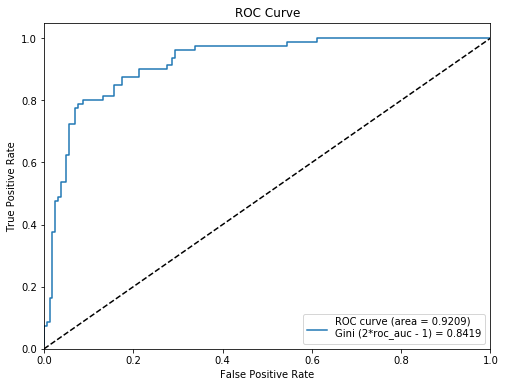

In [83]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [65]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [66]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0      96       1
Real_1      21      42


In [67]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.8625


In [68]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.821     0.990     0.897        97
          1      0.977     0.667     0.792        63

avg / total      0.882     0.863     0.856       160



ROC AUC: 0.9509


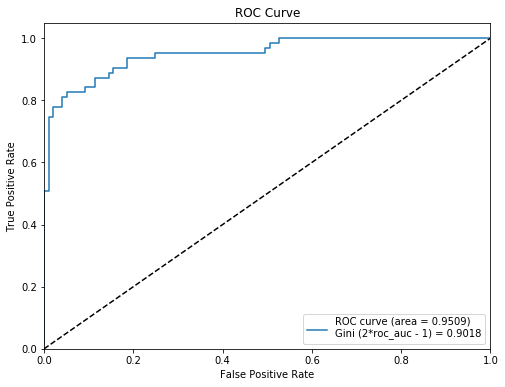

In [69]:
graficar_roc(y_test,pred_proba_test) # 0.9514

### 4.2 DECISION TREE

### 4.2.1 Entrenamiento y Predicción

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Crear objeto modelo (Instanciar)
model_tree = DecisionTreeClassifier(max_depth=5)

In [72]:
# Entrenar (ajustar) el modelo:
model = model_tree.fit(X_train,y_train)

In [73]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 4.2.2 Evaluación del Modelo

In [74]:
from sklearn import metrics as mt

In [75]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [76]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     159       1
Real_1       7      73


In [77]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.966666666667


In [78]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.958     0.994     0.975       160
          1      0.986     0.912     0.948        80

avg / total      0.967     0.967     0.966       240



ROC AUC: 0.9917


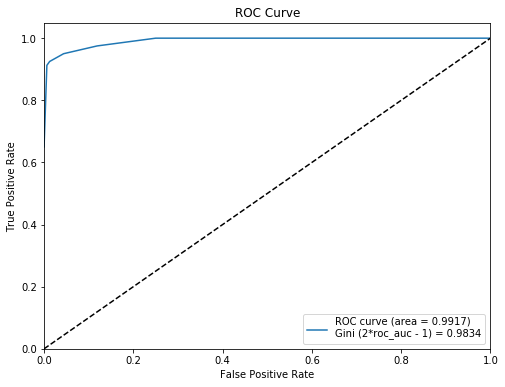

In [79]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [80]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [81]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0      96       1
Real_1      15      48


In [82]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.9


In [83]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.865     0.990     0.923        97
          1      0.980     0.762     0.857        63

avg / total      0.910     0.900     0.897       160



ROC AUC: 0.9602


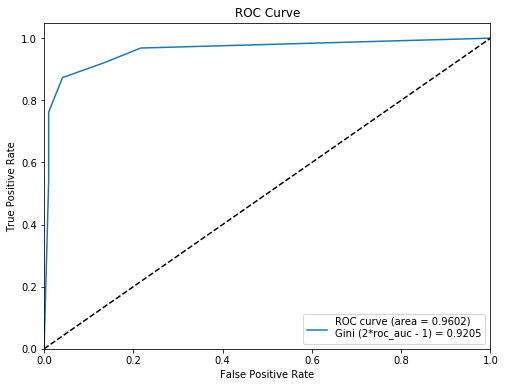

In [84]:
graficar_roc(y_test,pred_proba_test) # 0.9514

# MODELOS ENSAMBLADOS

## 5.1 RANDOM FOREST

### 5.1.1 Entrenamiento y Predicción

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Crear objeto modelo (Instanciar)
model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, random_state=100 , max_features = 5)

In [87]:
# Entrenar (ajustar) el modelo:
model = model_rf.fit(X_train,y_train)

In [88]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 5.1.2 Evaluación del Modelo

In [89]:
from sklearn import metrics as mt

In [90]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [91]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     155       5
Real_1       5      75


In [92]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.958333333333


In [93]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.969     0.969     0.969       160
          1      0.938     0.938     0.938        80

avg / total      0.958     0.958     0.958       240



ROC AUC: 0.9938


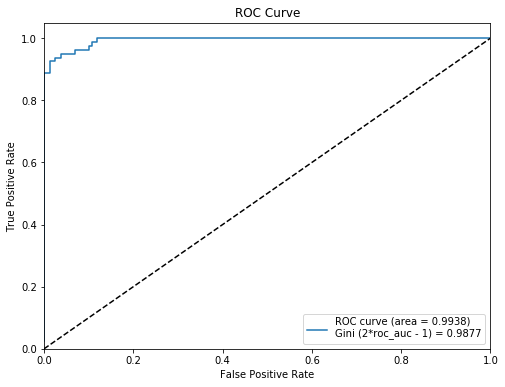

In [94]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [95]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [96]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0      94       3
Real_1      13      50


In [97]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.9


In [98]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.879     0.969     0.922        97
          1      0.943     0.794     0.862        63

avg / total      0.904     0.900     0.898       160



ROC AUC: 0.9815


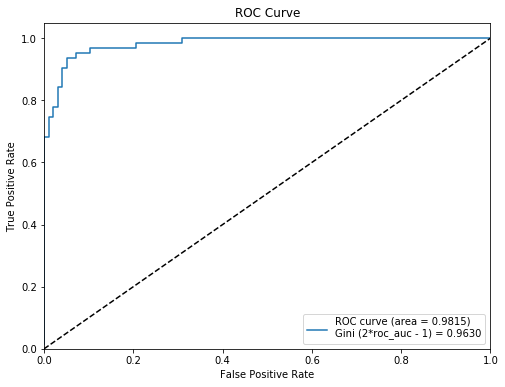

In [99]:
graficar_roc(y_test,pred_proba_test) # 0.9514

### 5.1.3 Variables Importantes

In [100]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [101]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,EDAD,0.497732
1,INGRESOS,0.385549
2,EDAD_RANGO,0.057010
3,ESTADOCIVIL_D,0.022905
4,SEXO,0.017808
5,ESTADOCIVIL_S,0.011853
6,ESTADOCIVIL_C,0.007143


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

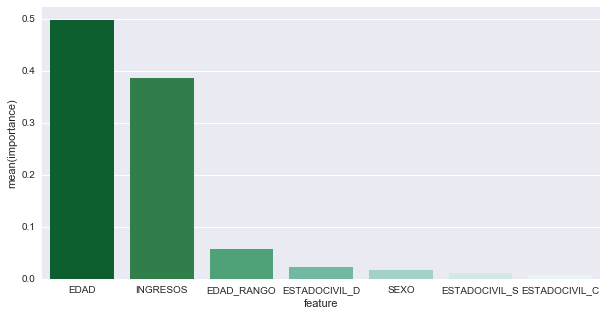

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

## 5.2 GRADIENT BOOSTING MACHINE

### 5.2.1 Entrenamiento y Predicción

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
# Crear objeto modelo (Instanciar)
model_gbm = GradientBoostingClassifier(max_depth=4, n_estimators= 50, random_state=100 , max_features = 5)

In [106]:
# Entrenar (ajustar) el modelo:
model = model_gbm.fit(X_train,y_train)

In [107]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 5.2.2 Evaluación del Modelo

In [108]:
from sklearn import metrics as mt

In [109]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [110]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     160       0
Real_1       4      76


In [111]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.983333333333


In [112]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.976     1.000     0.988       160
          1      1.000     0.950     0.974        80

avg / total      0.984     0.983     0.983       240



ROC AUC: 0.9993


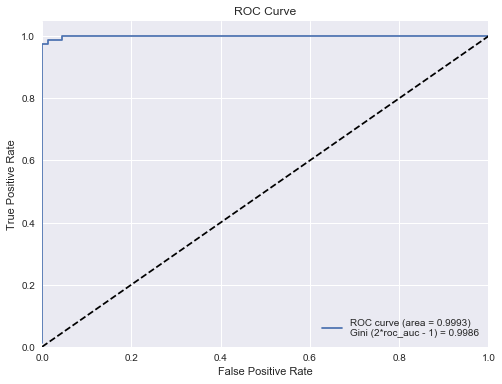

In [113]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [114]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [115]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0      95       2
Real_1      10      53


In [116]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.925


In [117]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.905     0.979     0.941        97
          1      0.964     0.841     0.898        63

avg / total      0.928     0.925     0.924       160



ROC AUC: 0.9872


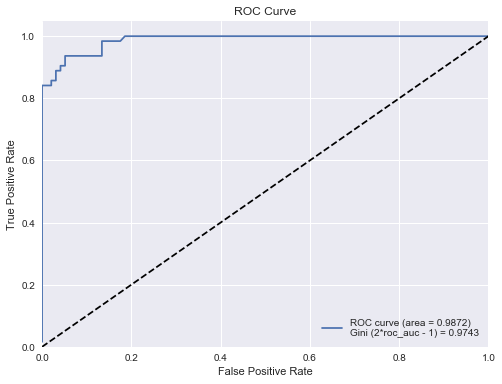

In [118]:
graficar_roc(y_test,pred_proba_test) # 0.9514

### 5.1.3 Variables Importantes

In [119]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [120]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,INGRESOS,0.545495
1,EDAD,0.322131
2,EDAD_RANGO,0.041674
3,SEXO,0.033059
4,ESTADOCIVIL_S,0.029248
5,ESTADOCIVIL_D,0.015920
6,ESTADOCIVIL_C,0.012473


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

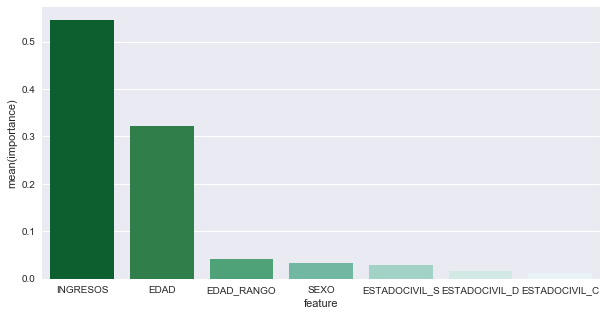

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

# Croos Validation

In [124]:
X_train_cv = X_train.copy()
y_train_cv = y_train.copy()

In [125]:
# Instanciar Modelo Base:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, random_state=100 , max_features = 5)

In [ ]:
# Cros Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
k = 5 # n folds
metric = 'roc_auc' # métrica que nosotros usaremos para evaluar cv score

cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 123, shuffle = True)
#cv = cross_validation.StratifiedKFold(y_train_cv, n_folds=k, random_state = 851, shuffle = True) # 16

results_train = []
results_test = []
list_models = [] 

In [ ]:
i = 1
for traincv, testcv in cv:
    model = clone(model_rf)
    # Entrenar el modelo
    model = model.fit(X_train_cv.values[traincv], y_train_cv[traincv])
    # Calcular probabilidades
    probas_train = model.predict_proba(X_train_cv.values[traincv])[:,1]
    probas_test = model.predict_proba(X_train_cv.values[testcv])[:,1]
    # Calcular indicadores
    metric_train = roc_auc_score(y_train_cv[traincv],probas_train)
    metric_test = roc_auc_score(y_train_cv[testcv],probas_test)
    # Almacenar metricas y modelos
    results_train.append(metric_train)
    results_test.append(metric_test)
    list_models.append(model)
    
    print("Ok - ",str(i),": ", str(round(metric_train,6)), str(round(metric_test,6)))
    print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))

    i = i + 1

result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

print("CV roc - train :",result_final_train)
print("CV roc - test  :",result_final_test)

#### Calcular las predicciones sobre el X_test ..

In [ ]:
df_probas_subm = pd.DataFrame()
i = 1
for model in list_models:
    probas_tmp = model.predict_proba(X_test)[:,1]
    df_probas_subm["model"+str(i)] = probas_tmp
    i += 1

In [ ]:
df_probas_subm.head()

In [ ]:
y_probas_subm = df_probas_subm.apply(np.mean, axis = 1)
y_probas_subm

In [ ]:
roc_auc_score(y_test,y_probas_subm)

# Stacking Ensembling

In [126]:
model_regl = LogisticRegression()
model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, random_state=100 , max_features = 5)
model_gbm = GradientBoostingClassifier(max_depth=4, n_estimators= 50, random_state=100 , max_features = 5)

In [127]:
model_regl = model_regl.fit(X_train,y_train)
model_rf = model_rf.fit(X_train,y_train)
model_gbm = model_gbm.fit(X_train,y_train)

In [144]:
# Probabilidades  TRAIN ::
pred_proba_train_regl = model_regl.predict_proba(X_train)[:,1]
pred_proba_train_rf = model_rf.predict_proba(X_train)[:,1]
pred_proba_train_gbm = model_gbm.predict_proba(X_train)[:,1]

In [ ]:
# Probabilidades TEST ::
pred_proba_test_regl = model_regl.predict_proba(X_test)[:,1]
pred_proba_test_rf = model_rf.predict_proba(X_test)[:,1]
pred_proba_test_gbm = model_gbm.predict_proba(X_test)[:,1]

In [153]:
roc_regl = mt.roc_auc_score(y_test,pred_proba_test_regl)
roc_rf = mt.roc_auc_score(y_test,pred_proba_test_rf)
roc_gbm = mt.roc_auc_score(y_test,pred_proba_test_gbm)

In [158]:
print("REG LOG: ",roc_regl)
print("RF:      ",roc_rf)
print("GBM:     ",roc_gbm)

REG LOG:  0.950908198331
RF:       0.981508754705
GBM:      0.987154311897
